In [31]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

1. Descarga los datos y carga el dataset en tu libreta.

In [74]:
mypath = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
data = pd.read_csv(mypath, sep=",")


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [33]:
df = pd.DataFrame(data)
print(df.shape)
print(df.head())
print(df.dtypes)
print(df.info())
print(df.isna())


(30000, 25)
   ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 25 columns]
ID       int64
X1       int64
X2     float64
X3     float64
X4     flo

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [34]:
df = df.fillna(df.mean())
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [35]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


5. Realiza el conteo de las variables categóricas

In [77]:
X_4 = df.X4.value_counts()
X_2 = df.X2.value_counts()
X_3 = df.X3.value_counts()

print(X_2)
print(X_3)
print(X_4)

2.000000    18112
1.000000    11887
1.603753        1
Name: X2, dtype: int64
2.000000    14030
1.000000    10585
3.000000     4915
5.000000      280
4.000000      123
6.000000       51
0.000000       14
1.853057        2
Name: X3, dtype: int64
2.000000    15964
1.000000    13657
3.000000      323
0.000000       54
1.551903        2
Name: X4, dtype: int64


6. Escala los datos, si consideras necesario

In [83]:
Std_data = preprocessing.StandardScaler().fit_transform(df)
Std_data = pd.DataFrame(Std_data)
Std_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.731993,-1.136720,0.810140,0.185938,-1.057405,-1.245968,1.794552,1.782331,-0.697050,-0.666577,...,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426,1.876533
1,-1.731878,-0.365981,0.810140,0.185938,0.858519,-1.028980,-0.875071,1.782331,0.139148,0.188886,...,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922,1.876533
2,-1.731762,-0.597202,0.810140,0.185938,0.858519,-0.161028,0.014803,0.111674,0.139148,0.188886,...,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165,-0.532951
3,-1.731647,-0.905498,0.810140,0.185938,-1.057405,0.164454,0.014803,0.111674,0.139148,0.188886,...,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174,-0.532951
4,-1.731531,-0.905498,-1.234395,0.185938,-1.057405,2.334333,-0.875071,0.111674,-0.697050,0.188886,...,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231,-0.532951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,-1.234395,1.451312,-1.057405,0.381442,0.014803,0.111674,0.139148,0.188886,...,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174,-0.532951
29996,1.731647,-0.134759,-1.234395,1.451312,0.858519,0.815417,-0.875071,-0.723654,-0.697050,-0.666577,...,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426,-0.532951
29997,1.731762,-1.059646,-1.234395,0.185938,0.858519,0.164454,3.574301,2.617659,1.811545,-0.666577,...,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044,1.876533
29998,1.731878,-0.674276,-1.234395,1.451312,-1.057405,0.598430,0.904677,-0.723654,0.139148,0.188886,...,0.147654,-0.468312,0.168981,4.844741,-0.109091,-0.229903,-0.185199,3.152532,-0.191947,1.876533


7. Reduce las dimensiones con PCA, si consideras necesario

In [84]:
Minmax = preprocessing.MinMaxScaler().fit_transform(df)
Minmax = pd.DataFrame(Minmax)
Minmax

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.000033,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.000067,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.000100,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.000133,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999867,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,0.2,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,0.999900,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,0.1,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,0.999933,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,0.1,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,0.999967,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,0.2,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


a) Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [85]:
Minmax.var()

0     0.083342
1     0.017176
2     0.239235
3     0.017349
4     0.030270
5     0.025255
6     0.012629
7     0.014332
8     0.014302
9     0.013665
10    0.012837
11    0.013222
12    0.004245
13    0.004562
14    0.001450
15    0.003672
16    0.003634
17    0.002094
18    0.000359
19    0.000187
20    0.000386
21    0.000636
22    0.001283
23    0.001131
24    0.172253
dtype: float64

b) Indica la importancia de las variables en cada componente

8. Elabora los histogramas de los atributos para visualizar su distribución

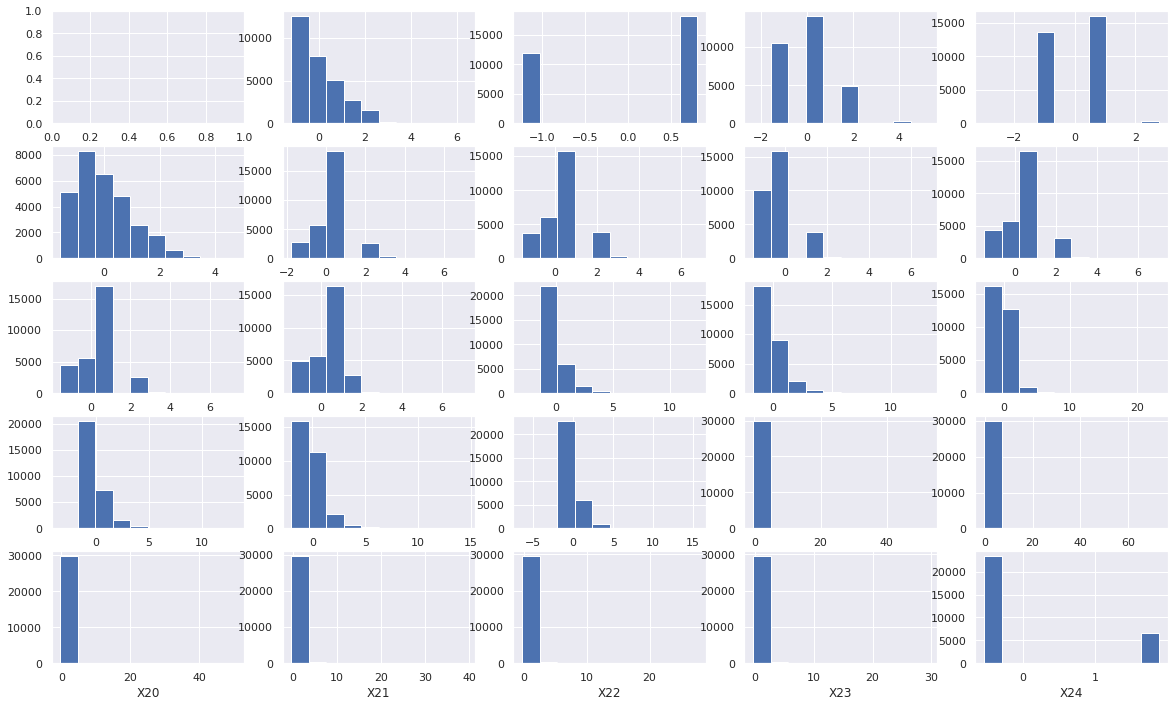

In [71]:
Std_data = pd.DataFrame(Std_data)
sns.set(rc={'figure.figsize':(20,12)})

fig, axes = plt.subplots(5, 5)    # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
for k in range(1,25):
  plt.subplot(5,5,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(Std_data[Std_data.columns[k]], bins=10)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel("X" + str(Std_data.columns[k]))
plt.show()

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

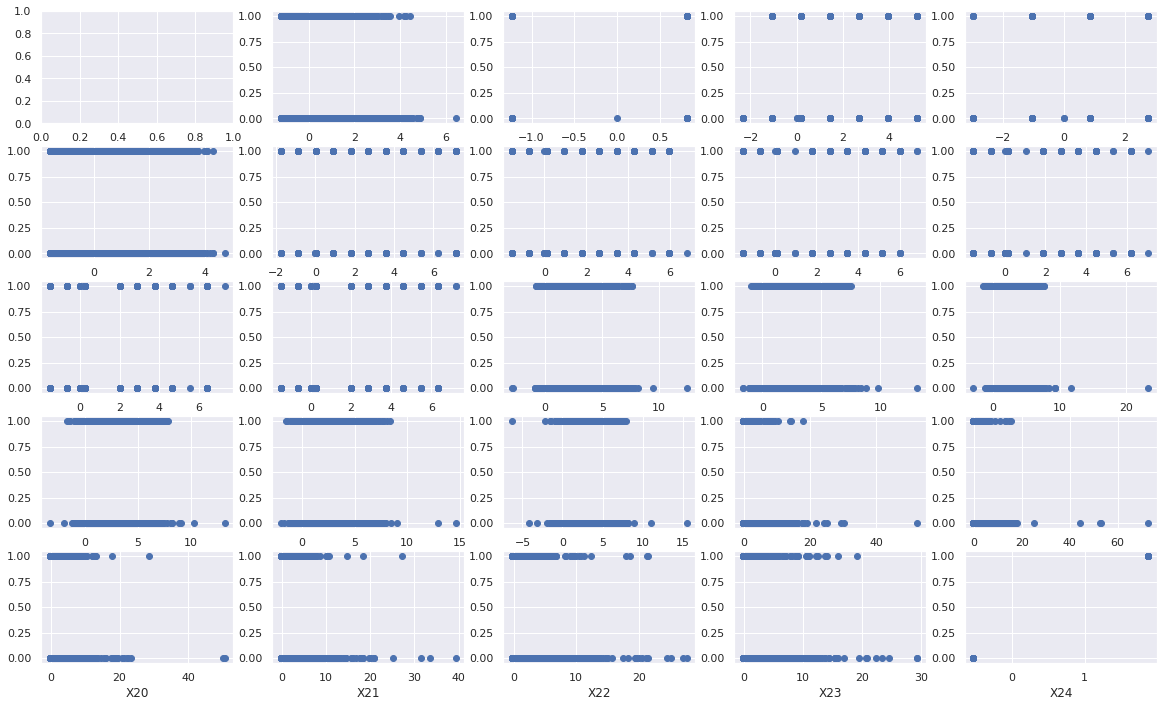

In [92]:
sns.set(rc={'figure.figsize':(20,12)})
y = data.iloc[:,-1] 
fig, axes = plt.subplots(5, 5)    # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
for k in range(1,25):
  plt.subplot(5,5,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.scatter(Std_data[Std_data.columns[k]], y)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel("X" + str(Std_data.columns[k]))
plt.show()

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Estas gráficas nos ayudan a entender la relación que hay entre nuestras variables para encontrar aquellas que nos sean de mayor relevancia o impacto.